In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
data1 = pd.read_csv("FinalDataSet.csv")

In [5]:
data1

,STATE/UT,YEAR,AGE_GROUP,GENDER,MURDER,ROBBERY,KIDNAPP,FRAUD,VIOLENCE
0,ANDAMAN & NICOBAR ISLANDS,2002,Below 18,MALE,3,16,1,1,1
1,ANDAMAN & NICOBAR ISLANDS,2002,Below 18,FEMALE,0,1,1,1,1
2,ANDAMAN & NICOBAR ISLANDS,2002,18 to 60,MALE,12,140,3,15,120
3,ANDAMAN & NICOBAR ISLANDS,2002,18 to 60,FEMALE,3,1,1,1,5
4,ANDAMAN & NICOBAR ISLANDS,2002,Above 60,MALE,0,1,1,1,5
...,...,...,...,...,...,...,...,...,...
2491,WEST BENGAL,2012,Below 18,FEMALE,3,32,20,2,22
2492,WEST BENGAL,2012,18 to 60,MALE,2518,47163,8307,6571,35254
2493,WEST BENGAL,2012,18 to 60,FEMALE,180,44,709,366,9376
2494,WEST BENGAL,2012,Above 60,MALE,37,88,92,85,812


In [6]:
data1.isnull().values.any()

False

In [7]:
data1['STATE/UT'].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH',
       'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH',
       'DADAR & NAGAR HAVELI', 'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT',
       'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND',
       'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND',
       'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL'], dtype=object)

In [8]:
data2 =pd.read_csv("FinalDataSet.csv") #to use for calculations 
data2.head()

,STATE/UT,YEAR,AGE_GROUP,GENDER,MURDER,ROBBERY,KIDNAPP,FRAUD,VIOLENCE
0,ANDAMAN & NICOBAR ISLANDS,2002,Below 18,MALE,3,16,1,1,1
1,ANDAMAN & NICOBAR ISLANDS,2002,Below 18,FEMALE,0,1,1,1,1
2,ANDAMAN & NICOBAR ISLANDS,2002,18 to 60,MALE,12,140,3,15,120
3,ANDAMAN & NICOBAR ISLANDS,2002,18 to 60,FEMALE,3,1,1,1,5
4,ANDAMAN & NICOBAR ISLANDS,2002,Above 60,MALE,0,1,1,1,5


In [9]:
from sklearn.preprocessing import LabelEncoder
l1, l2, l3 = LabelEncoder(), LabelEncoder(), LabelEncoder()

data2['GENDER'] = l1.fit_transform(data2['GENDER'])
data2['STATE/UT'] = l2.fit_transform(data2['STATE/UT'])
data2['AGE_GROUP'] = l2.fit_transform(data2['AGE_GROUP'])

In [10]:
data2.head()

,STATE/UT,YEAR,AGE_GROUP,GENDER,MURDER,ROBBERY,KIDNAPP,FRAUD,VIOLENCE
0,0,2002,2,1,3,16,1,1,1
1,0,2002,2,0,0,1,1,1,1
2,0,2002,0,1,12,140,3,15,120
3,0,2002,0,0,3,1,1,1,5
4,0,2002,1,1,0,1,1,1,5


# OVERALL CRIME ANALYSIS

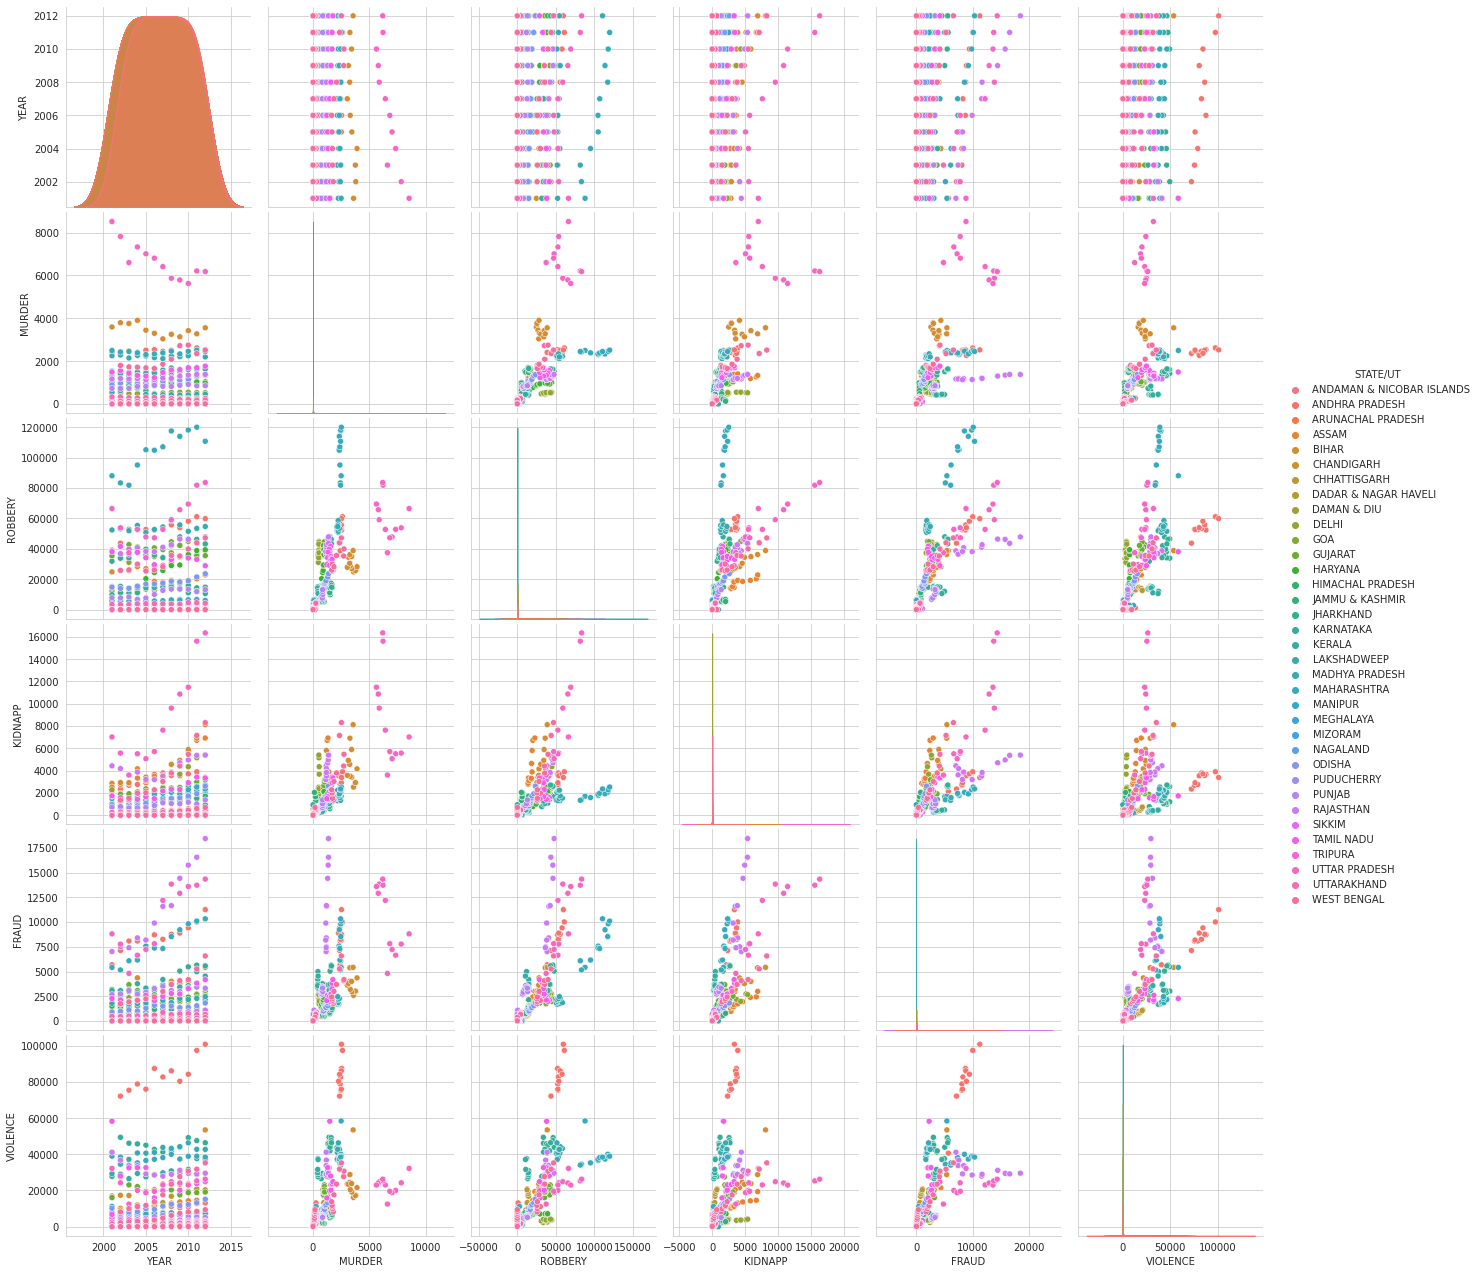

In [11]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data1, hue="STATE/UT", height=3)
plt.show()

### CRIME CATEGORY MURDER

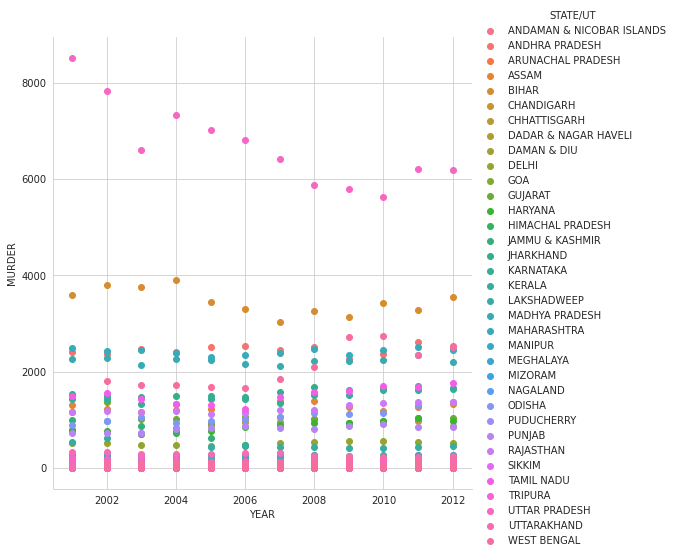

In [12]:
sns.set_style("whitegrid")
sns.FacetGrid(data1, hue="STATE/UT", height=7) \
.map(plt.scatter, "YEAR", "MURDER") \
.add_legend();
plt.show()

### CRIME CATEGORY ROBBERY

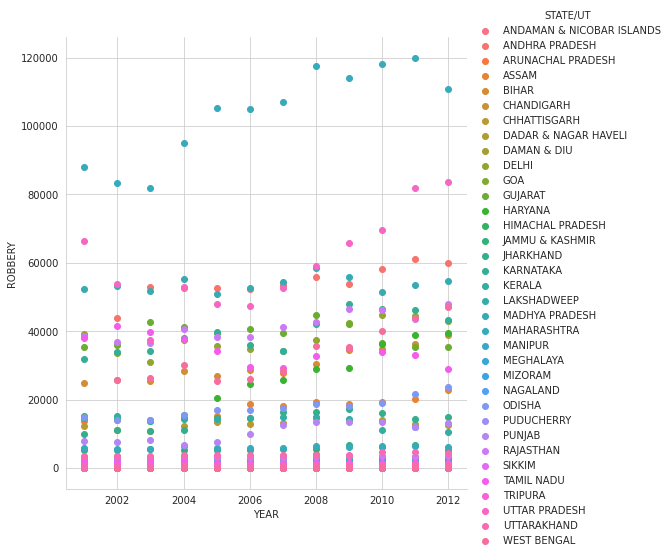

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(data1, hue="STATE/UT", height=7) \
.map(plt.scatter, "YEAR", "ROBBERY") \
.add_legend();
plt.show()

### CRIME CATEGORY KIDNAPP

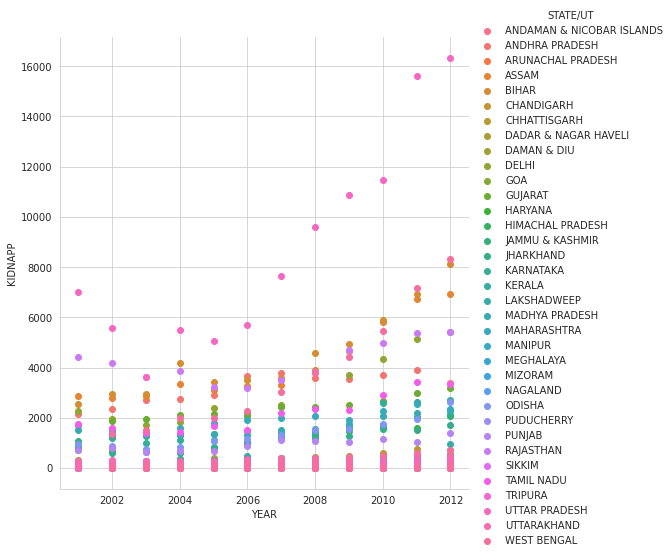

In [14]:
sns.set_style("whitegrid")
sns.FacetGrid(data1, hue="STATE/UT", height=7) \
.map(plt.scatter, "YEAR", "KIDNAPP") \
.add_legend();
plt.show()

### CRIME CATEGORY FRAUD

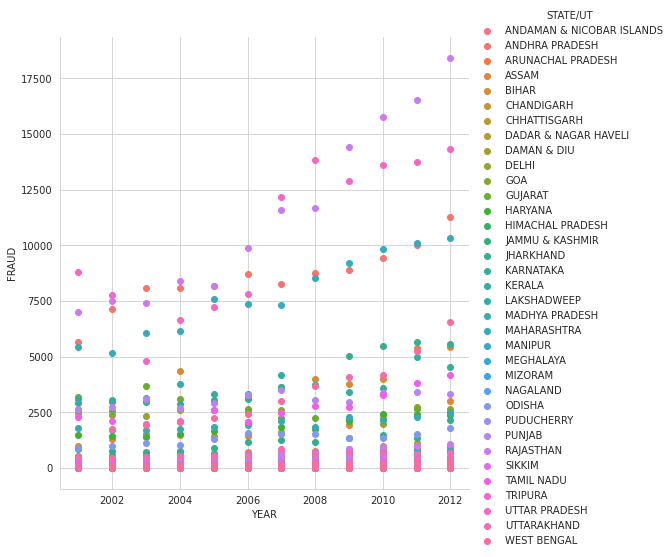

In [15]:
sns.set_style("whitegrid")
sns.FacetGrid(data1, hue="STATE/UT", height=7) \
.map(plt.scatter, "YEAR", "FRAUD") \
.add_legend();
plt.show()

### CRIME CATEGORY FRAUD

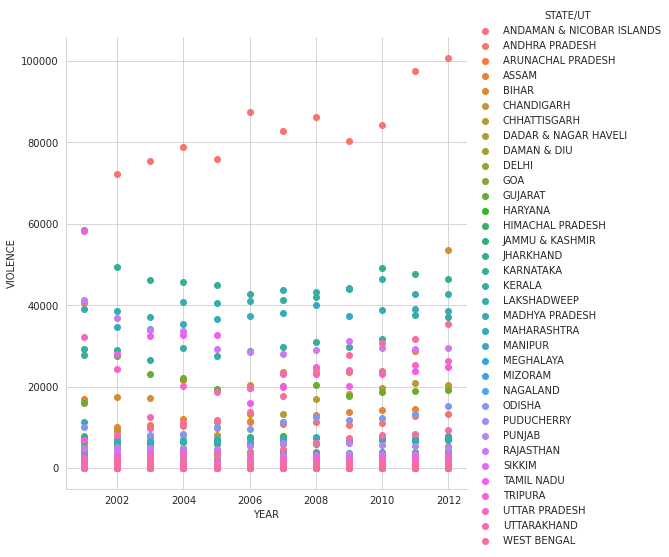

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(data1, hue="STATE/UT", height=7) \
.map(plt.scatter, "YEAR", "VIOLENCE") \
.add_legend();
plt.show()

In [20]:
X=data2.iloc[:,[0,1,2,3]].values

X

array([[   0, 2002,    2,    1],
       [   0, 2002,    2,    0],
       [   0, 2002,    0,    1],
       ...,
       [  34, 2012,    0,    0],
       [  34, 2012,    1,    1],
       [  34, 2012,    1,    0]])

In [21]:
y=data2.iloc[:,[4,5,6,7,8]].values
y

array([[   3,   16,    1,    1,    1],
       [   0,    1,    1,    1,    1],
       [  12,  140,    3,   15,  120],
       ...,
       [ 180,   44,  709,  366, 9376],
       [  37,   88,   92,   85,  812],
       [   5,   32,   13,   13,  170]])

#### Data Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [23]:
X_train.shape, X_test.shape

((1996, 4), (500, 4))

#### KNN Model 

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)




In [34]:
from sklearn.neighbors import KNeighborsRegressor

# define model
model = KNeighborsRegressor(3)
# fit model
model.fit(x, y)

KNeighborsRegressor(n_neighbors=3)

In [35]:
model.score(X_test,y_test)

0.6412818014066831